(33.00000078976154, 0.05000000074505806, 0.0, 14.849999625235796, 0.0, -0.05000000074505806)
maxmin value 1.0 7.0
maxmin value 1.0 7.0
maxmin value 1.0 6.0
maxmin value 1.0 6.0
maxmin value 1.0 5.0
maxmin value 1.0 5.0
maxmin value 1.0 7.0
maxmin value 1.0 7.0
maxmin value 1.0 6.0
maxmin value 1.0 6.0
maxmin value 1.0 6.0
maxmin value 1.0 6.0


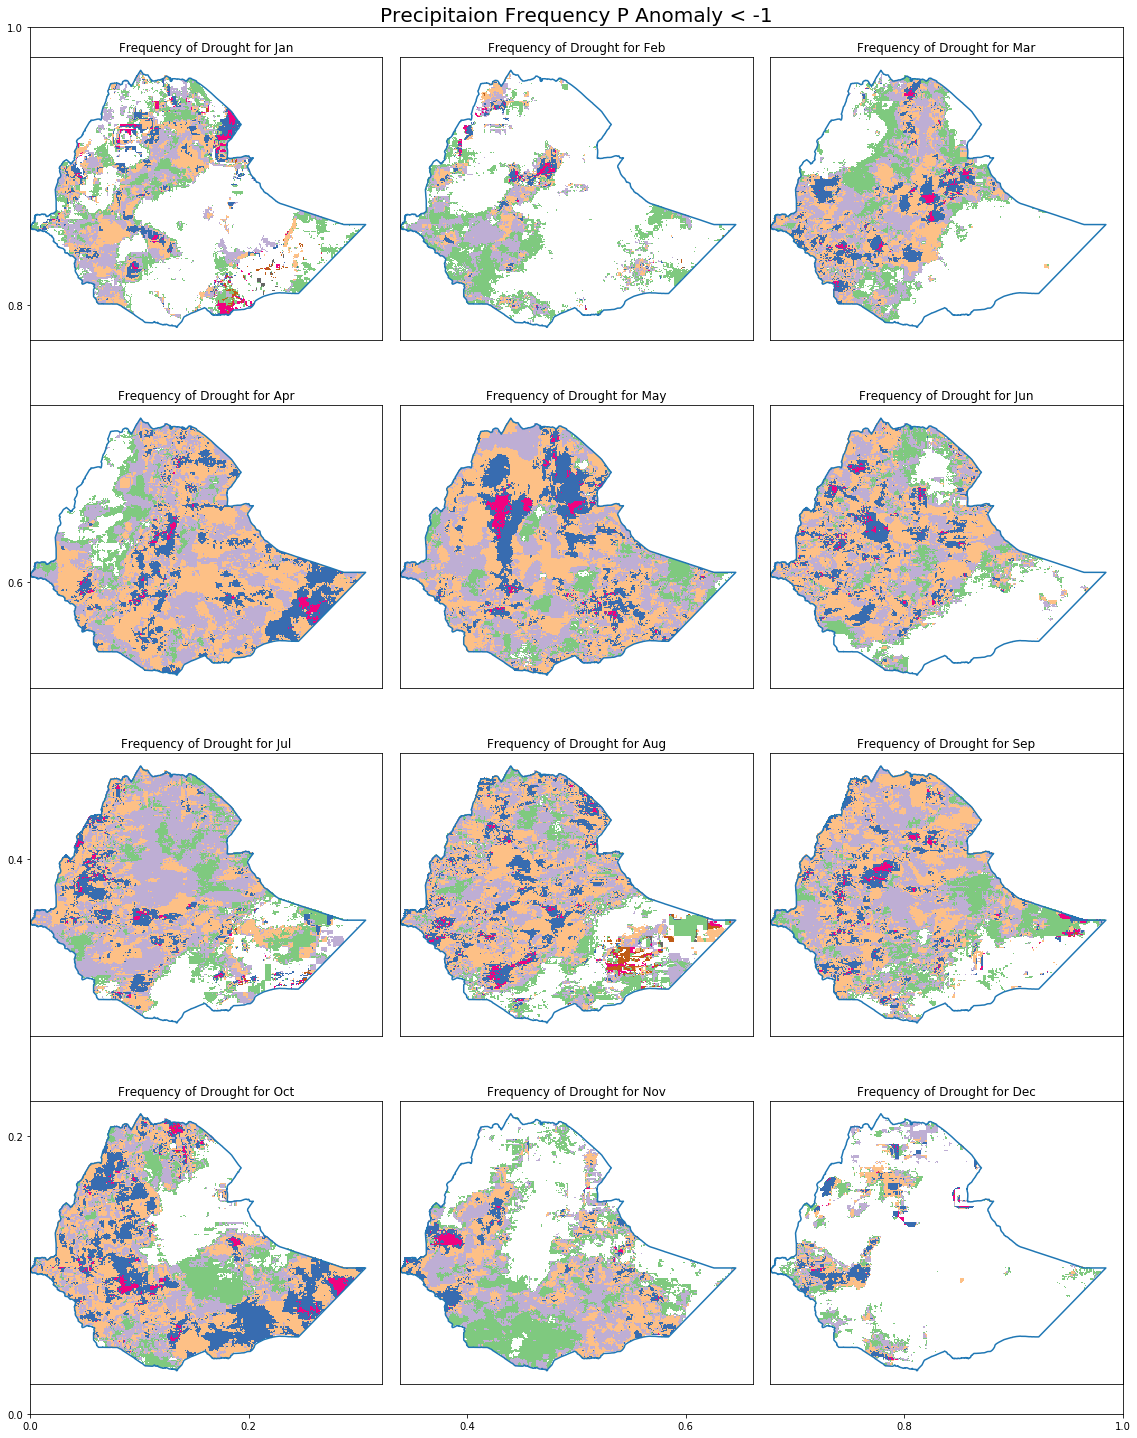

In [7]:
from DroughtFrequency import *
from matplotlib import pyplot as plt
from matplotlib import cm

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

rp = r"D:\Cornell\EthiopianDrought\Chirps2"
rpp = r"D:\Cornell\EthiopianDrought\AData\Chirps2Pars"

fig = plt.figure(figsize=(16, 20))
plt.title("Precipitaion Frequency P Anomaly < -1", fontsize=20)

rain = r'D:\Cornell\EthiopianDrought\Chirps2\chirps-v2.0.1981.03.tif'
rain = gdal.Open(rain)
geo_t = rain.GetGeoTransform()
print(geo_t)

daShapefile = r"D:\Cornell\EthiopianDrought\ETH_outline_SHP\ETH_outline.shp"

driver = ogr.GetDriverByName("ESRI Shapefile")
dataSource = driver.Open(daShapefile, 0)
layer = dataSource.GetLayer()
feature = layer.GetFeature(0)
geo = feature.GetGeometryRef()

# for feature in layer:
#     geom = feature.GetGeometryRef()
#     print (geom,"*********************")

geo = str(geo).split("((")[1].split("))")[0].split(",")
x = []
y = []
for term in geo:
    x.append(float(term.split(" ")[0]))
    y.append(float(term.split(" ")[1]))

x = np.array(x)
y = np.array(y)
x = (x - geo_t[0]) / geo_t[1]
y = (y - geo_t[3]) / geo_t[5]

for m in range(1, 13):
    ramn = AnomalyFrequency(rp, rpp, m)
    ax = fig.add_subplot(4, 3, m)
    ax.set_title("Frequency of Drought for " + months[m - 1])

    mask = np.ones_like(ramn, dtype=np.float)

    vmin = ramn[ramn > 0].min()
    vmax = ramn[ramn > 0].max()

    print("maxmin value", vmin, vmax)
    # ax.imshow(mask)
    cmap = plt.get_cmap("Accent",7)
    cax = ax.imshow(ramn, cmap=cmap, vmin=0.5, vmax=7.5)
    cmap.set_under('white')
#     cbar = plt.colorbar(cax, ax=ax)
#     cbar.ax.get_yaxis().set_ticks([])
#     for j, lab in enumerate(['$-1$', '$-2$', '$-3$', '$-4$','$-5$','$-6$','$-7$']):
#         cbar.ax.text(10, 1+j, lab, ha='center', va='center')
    ax.plot(x, y)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()  # 调整整体空白
plt.show()